## Data Cleaning

In [20]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [21]:
img = cv2.imread('./test_images/cris1.jpg')
img.shape

(375, 500, 3)

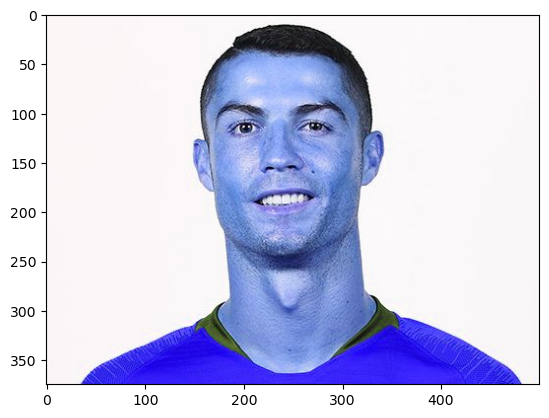

In [22]:
plt.imshow(img)

In [23]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(375, 500)

In [24]:
gray

array([[247, 247, 247, ..., 248, 248, 248],
       [247, 247, 247, ..., 248, 248, 248],
       [247, 247, 247, ..., 248, 248, 248],
       ...,
       [246, 246, 246, ..., 246, 246, 246],
       [246, 246, 246, ..., 246, 246, 246],
       [246, 246, 246, ..., 246, 246, 246]], dtype=uint8)

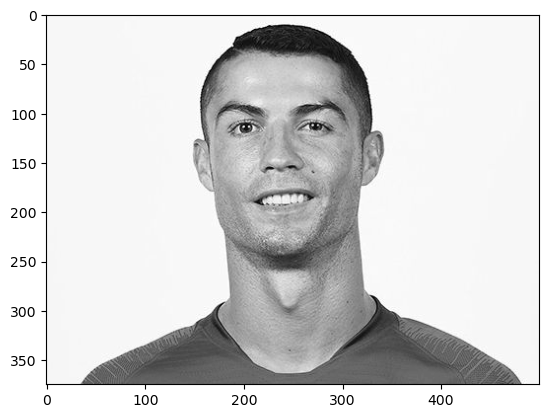

In [25]:
plt.imshow(gray, cmap='gray')

In [26]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[150,  44, 175, 175]])

In [27]:
(x,y,w,h) = faces[0]
x,y,w,h

(150, 44, 175, 175)

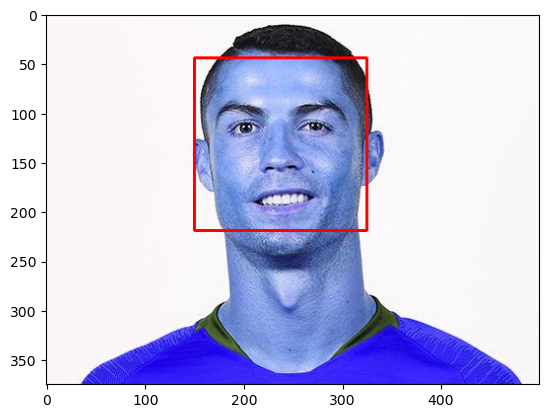

In [28]:
face_img = cv2.rectangle(img, (x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

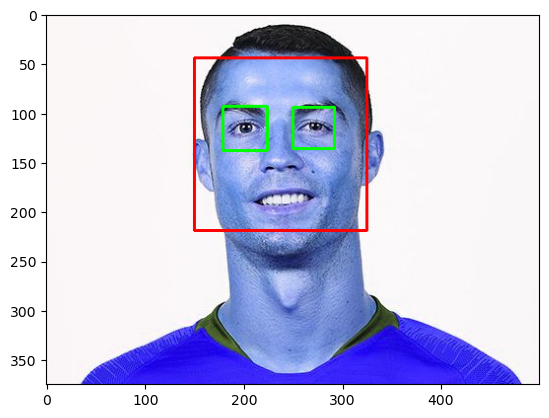

In [29]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for(ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        
plt.figure
plt.imshow(face_img, cmap='gray')
plt.show()

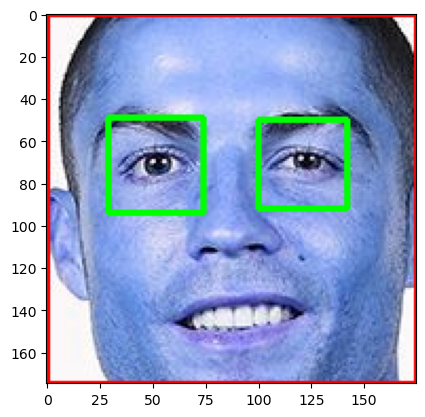

In [30]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [31]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >=2:
            return roi_color

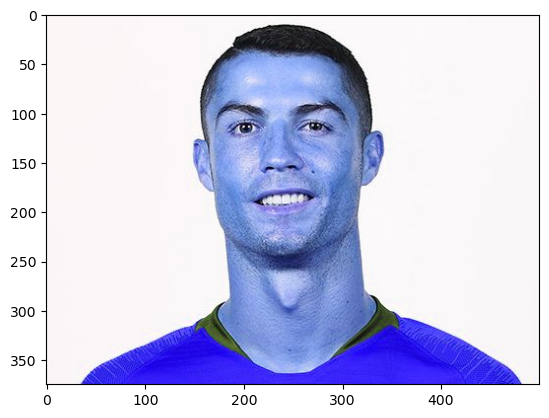

In [32]:
original_image = cv2.imread('./test_images/cris1.jpg')
plt.imshow(original_image)

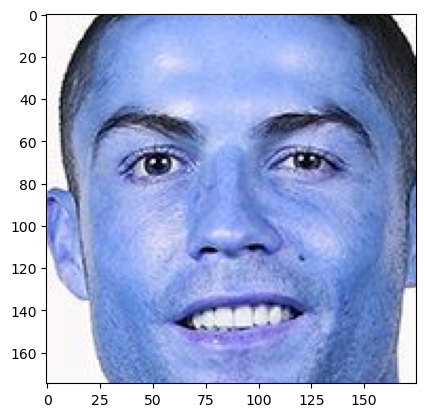

In [33]:
cropped_image = get_cropped_image_if_2_eyes('./test_images/cris1.jpg')
plt.imshow(cropped_image)

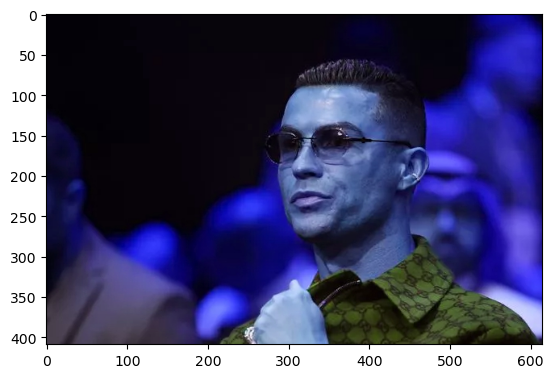

In [34]:
org_image_obstructed = cv2.imread('./test_images/cris2.jpg')
plt.imshow(org_image_obstructed)

In [35]:
cropped_image_no_2_eyes = get_cropped_image_if_2_eyes('./test_images/cris2.jpg')
cropped_image_no_2_eyes

In [56]:
path_to_data = "./dataset/"
path_to_cr_data = "./dataset/cropped/"

In [57]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [58]:
img_dirs

['./dataset/cristiano_ronaldo',
 './dataset/erling_haaland',
 './dataset/kylian_mbappe',
 './dataset/lionel_messi']

In [59]:
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)    

In [60]:
cropped_image_dirs =[]
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None: 
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
            
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count +=1

cristiano_ronaldo
Generating cropped images in folder:  ./dataset/cropped/cristiano_ronaldo
erling_haaland
Generating cropped images in folder:  ./dataset/cropped/erling_haaland
kylian_mbappe
Generating cropped images in folder:  ./dataset/cropped/kylian_mbappe
lionel_messi
Generating cropped images in folder:  ./dataset/cropped/lionel_messi


## Feature Engineering

In [61]:
import numpy as np
import pywt
import cv2

def w2d(img, mode='haar', level=1):
    imArray = img 
    #Datatype conversions
    #Convert to grayscale
    imArray = cv2.cvtColor(imArray,cv2.COLOR_RGB2GRAY)
    #Convert to float
    imArray = np.float32(imArray)
    imArray /= 255;
    #Compute coefficients
    coeffs=pywt.wavedec2(imArray, mode, level=level)
    
    #Process Coefficients
    coeffs_H = list(coeffs)
    coeffs_H[0] *=0;
    
    #reconstruction
    imArray_H = pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H = np.uint8(imArray_H)
    
    return imArray_H

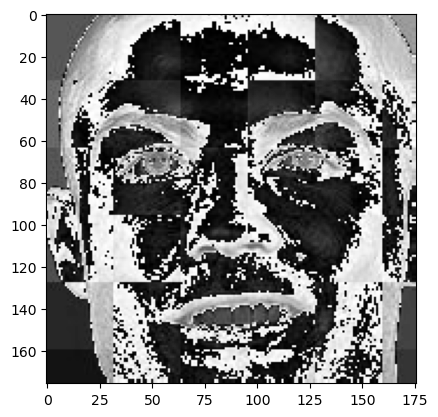

In [62]:
im_har = w2d(cropped_image, 'db1',5)
plt.imshow(im_har, cmap='gray')

In [63]:
celebrity_file_names_dict

{'cristiano_ronaldo': ['./dataset/cropped/cristiano_ronaldo/cristiano_ronaldo1.png',
  './dataset/cropped/cristiano_ronaldo/cristiano_ronaldo2.png',
  './dataset/cropped/cristiano_ronaldo/cristiano_ronaldo3.png',
  './dataset/cropped/cristiano_ronaldo/cristiano_ronaldo4.png',
  './dataset/cropped/cristiano_ronaldo/cristiano_ronaldo5.png',
  './dataset/cropped/cristiano_ronaldo/cristiano_ronaldo6.png',
  './dataset/cropped/cristiano_ronaldo/cristiano_ronaldo7.png',
  './dataset/cropped/cristiano_ronaldo/cristiano_ronaldo8.png',
  './dataset/cropped/cristiano_ronaldo/cristiano_ronaldo9.png',
  './dataset/cropped/cristiano_ronaldo/cristiano_ronaldo10.png',
  './dataset/cropped/cristiano_ronaldo/cristiano_ronaldo11.png',
  './dataset/cropped/cristiano_ronaldo/cristiano_ronaldo12.png',
  './dataset/cropped/cristiano_ronaldo/cristiano_ronaldo13.png',
  './dataset/cropped/cristiano_ronaldo/cristiano_ronaldo14.png',
  './dataset/cropped/cristiano_ronaldo/cristiano_ronaldo15.png',
  './dataset/

In [64]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'cristiano_ronaldo': 0,
 'erling_haaland': 1,
 'kylian_mbappe': 2,
 'lionel_messi': 3}

In [65]:
x = []
y = []

for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        if img is None:
            continue
        scalled_raw_img = cv2.resize(img, (32,32))
        img_har = w2d(img, 'db1',5)
        scalled_img_har = cv2.resize(img_har,(32,32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        x.append(combined_img)
        y.append(class_dict[celebrity_name])

In [66]:
32*32*3 + 32*32

4096

In [67]:
len(x[0])

4096

In [68]:
x = np.array(x).reshape(len(x),4096).astype(float)
x.shape

(316, 4096)

In [69]:
x[0]

array([45., 30., 28., ...,  0.,  0., 88.])

In [70]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict    

{'cristiano_ronaldo': ['./dataset/cropped/cristiano_ronaldo\\cristiano_ronaldo1.png',
  './dataset/cropped/cristiano_ronaldo\\cristiano_ronaldo10.png',
  './dataset/cropped/cristiano_ronaldo\\cristiano_ronaldo11.png',
  './dataset/cropped/cristiano_ronaldo\\cristiano_ronaldo12.png',
  './dataset/cropped/cristiano_ronaldo\\cristiano_ronaldo13.png',
  './dataset/cropped/cristiano_ronaldo\\cristiano_ronaldo14.png',
  './dataset/cropped/cristiano_ronaldo\\cristiano_ronaldo15.png',
  './dataset/cropped/cristiano_ronaldo\\cristiano_ronaldo16.png',
  './dataset/cropped/cristiano_ronaldo\\cristiano_ronaldo17.png',
  './dataset/cropped/cristiano_ronaldo\\cristiano_ronaldo19.png',
  './dataset/cropped/cristiano_ronaldo\\cristiano_ronaldo2.png',
  './dataset/cropped/cristiano_ronaldo\\cristiano_ronaldo20.png',
  './dataset/cropped/cristiano_ronaldo\\cristiano_ronaldo21.png',
  './dataset/cropped/cristiano_ronaldo\\cristiano_ronaldo22.png',
  './dataset/cropped/cristiano_ronaldo\\cristiano_ronaldo

In [71]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'cristiano_ronaldo': 0,
 'erling_haaland': 1,
 'kylian_mbappe': 2,
 'lionel_messi': 3}

In [72]:
x = []
y = []

for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        if img is None:
            continue
        scalled_raw_img = cv2.resize(img, (32,32))
        img_har = w2d(img, 'db1',5)
        scalled_img_har = cv2.resize(img_har,(32,32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        x.append(combined_img)
        y.append(class_dict[celebrity_name])

In [73]:
x[0]

array([[45],
       [30],
       [28],
       ...,
       [ 0],
       [ 0],
       [88]], dtype=uint8)

In [74]:
y[0]

0

In [75]:
x = np.array(x).reshape(len(x),4096).astype(float)
x.shape

(316, 4096)

## Model Training

In [76]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline 
from sklearn.metrics import classification_report

In [77]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(x_train, y_train)
pipe.score(x_test, y_test)

0.810126582278481

In [78]:
len(x_test)

79

In [80]:
print(classification_report(y_test, pipe.predict(x_test)))

              precision    recall  f1-score   support

           0       0.80      0.62      0.70        13
           1       0.84      1.00      0.91        21
           2       0.75      0.89      0.81        27
           3       0.92      0.61      0.73        18

    accuracy                           0.81        79
   macro avg       0.83      0.78      0.79        79
weighted avg       0.82      0.81      0.80        79



In [81]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [82]:
model_params = {
    'svm' : {
        'model': svm.SVC(gamma = 'auto', probability = True),
        'params': {
            'svc__C': [1,10,100,1000],
            'svc__kernel':['rbf','linear']
        }
    },
    'random_forest':{
        'model': RandomForestClassifier(),
        'params': {
            'randomforestclassifier__n_estimators':[1,5,10]
        }
    },
    'logistic_regression':{
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [83]:
scores = []
best_estimators = {}
import pandas as pd 
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf = GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(x_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.830762,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.717730,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.843706,{'logisticregression__C': 1}


In [84]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [85]:
best_estimators['svm']

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc',
                 SVC(C=1, gamma='auto', kernel='linear', probability=True))])

In [86]:
best_estimators['svm'].score(x_test,y_test)

0.8734177215189873

In [87]:
best_estimators['random_forest'].score(x_test,y_test)

0.7088607594936709

In [88]:
best_estimators['logistic_regression'].score(x_test,y_test)

0.9113924050632911

In [89]:
best_clf = best_estimators['logistic_regression']

In [90]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(x_test))
cm

array([[11,  0,  2,  0],
       [ 0, 21,  0,  0],
       [ 2,  1, 23,  1],
       [ 0,  1,  0, 17]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

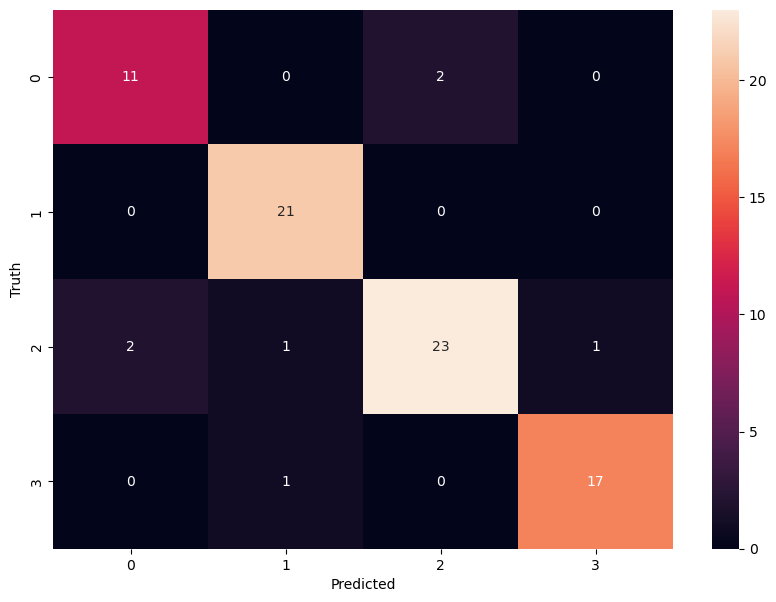

In [91]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [92]:
class_dict

{'cristiano_ronaldo': 0,
 'erling_haaland': 1,
 'kylian_mbappe': 2,
 'lionel_messi': 3}

In [93]:
!pip install joblib
import joblib
# Save the model as a pickle in a file
joblib.dump(best_clf, 'saved_model.pkl')

['saved_model.pkl']

In [94]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))